## 5.1 Risk-Adjusted Return Ratios

For the following concepts, we are going to use the data from Yahoo Finance as done in the previous lesson.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the assets and their respective portfolio weights
assets = ['TSLA', 'GOOG', 'IBM']
portfolio = [0.45, 0.35, 0.20]

In [ ]:
# Define the time period for historical data and the initial investment amount
time = "5y"

In [ ]:
investment = 10000

In [ ]:

# Initialize an empty list to store dataframes for each asset
dfs = []

In [ ]:
# Long coding box

# Loop through each asset and its corresponding portfolio weight
for asset, p in zip(assets, portfolio):
    # Download historical data for the asset
    data = yf.download(tickers=asset, period=time)

    # Create a dataframe with the adjusted closing prices
    data = pd.DataFrame(data['Adj Close'])

    # Calculate normalized returns (returns relative to the first closing price)
    data['Norm return'] = data['Adj Close'] / data.iloc[0]['Adj Close']

    # Calculate the allocation (normalized returns multiplied by the portfolio weight)
    data['Allocation'] = data['Norm return'] * p

    # Calculate the position value (allocation multiplied by the initial investment)
    data['Position'] = data['Allocation'] * investment

    # Append the dataframe to the list
    dfs.append(data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Show the first 5 records of Tesla
dfs[0].head(5)

,Adj Close,Norm return,Allocation,Position
Date,,,,
2019-07-05,15.540000,1.000000,0.450000,4500.000000
2019-07-08,15.356000,0.988160,0.444672,4446.718142
2019-07-09,15.337333,0.986958,0.444131,4441.312576
2019-07-10,15.928000,1.024968,0.461236,4612.355354
2019-07-11,15.906667,1.023595,0.460618,4606.177643


In [ ]:
# Extract the 'Position' column from each dataframe in dfs and create a list
all_pos = [dfs[0]['Position'], dfs[1]['Position'], dfs[2]['Position']]
all_pos

[Date
 2019-07-05     4500.000000
 2019-07-08     4446.718142
 2019-07-09     4441.312576
 2019-07-10     4612.355354
 2019-07-11     4606.177643
                   ...     
 2024-06-27    57167.953278
 2024-06-28    57301.159856
 2024-07-01    60770.270596
 2024-07-02    66967.180041
 2024-07-03    71348.455597
 Name: Position, Length: 1258, dtype: float64,
 Date
 2019-07-05     3500.000000
 2019-07-08     3452.862944
 2019-07-09     3479.091593
 2019-07-10     3527.496813
 2019-07-11     3539.033610
                   ...     
 2024-06-27    11572.287819
 2024-06-28    11359.247585
 2024-07-01    11425.513413
 2024-07-02    11556.805255
 2024-07-03    11605.110780
 Name: Position, Length: 1258, dtype: float64,
 Date
 2019-07-05    2000.000000
 2019-07-08    1988.541393
 2019-07-09    1971.000475
 2019-07-10    1987.127069
 2019-07-11    1998.019373
                  ...     
 2024-06-27    3212.158368
 2024-06-28    3251.640386
 2024-07-01    3292.062802
 2024-07-02    3333.425040
 2

In [ ]:
# Concatenate the position values
# axis=0 Concatenate along the rows, axis=1 Concatenate along the columns (3 columns)

portf_val = pd.concat(all_pos, axis=1)
portf_val

,Position,Position,Position
Date,,,
2019-07-05,4500.000000,3500.000000,2000.000000
2019-07-08,4446.718142,3452.862944,1988.541393
2019-07-09,4441.312576,3479.091593,1971.000475
2019-07-10,4612.355354,3527.496813,1987.127069
2019-07-11,4606.177643,3539.033610,1998.019373
...,...,...,...
2024-06-27,57167.953278,11572.287819,3212.158368
2024-06-28,57301.159856,11359.247585,3251.640386
2024-07-01,60770.270596,11425.513413,3292.062802


In [ ]:
# Set the column names of the dataframe to the asset names
portf_val.columns = assets
portf_val

,TSLA,GOOG,IBM
Date,,,
2019-07-05,4500.000000,3500.000000,2000.000000
2019-07-08,4446.718142,3452.862944,1988.541393
2019-07-09,4441.312576,3479.091593,1971.000475
2019-07-10,4612.355354,3527.496813,1987.127069
2019-07-11,4606.177643,3539.033610,1998.019373
...,...,...,...
2024-06-27,57167.953278,11572.287819,3212.158368
2024-06-28,57301.159856,11359.247585,3251.640386
2024-07-01,60770.270596,11425.513413,3292.062802


In [ ]:
# Add a new column 'Total' which is the sum of all position values across assets
portf_val['Total'] = portf_val.sum(axis=1)
portf_val

,TSLA,GOOG,IBM,Total
Date,,,,
2019-07-05,4500.000000,3500.000000,2000.000000,10000.000000
2019-07-08,4446.718142,3452.862944,1988.541393,9888.122479
2019-07-09,4441.312576,3479.091593,1971.000475,9891.404644
2019-07-10,4612.355354,3527.496813,1987.127069,10126.979236
2019-07-11,4606.177643,3539.033610,1998.019373,10143.230626
...,...,...,...,...
2024-06-27,57167.953278,11572.287819,3212.158368,71952.399465
2024-06-28,57301.159856,11359.247585,3251.640386,71912.047827
2024-07-01,60770.270596,11425.513413,3292.062802,75487.846811


<Axes: xlabel='Date'>

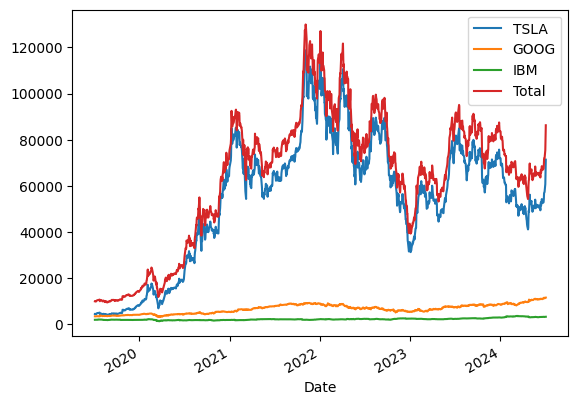

In [ ]:
# Plot the total portfolio value over time
portf_val.plot()

We want to divide the most recent portfolio value by the initial portfolio value to get the growth factor of the portfolio

In [ ]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (portf_val['Total'][-1] / portf_val['Total'][0] - 1)
cumulative_return

762.5747364055467

In [ ]:
# Print the cumulative return
print(f'\nThe cumulative return is: {cumulative_return:.2f}%\n\n')


The cumulative return is: 762.57%




In [ ]:
# Create a copy of the portfolio value dataframe
portf_val_growth = portf_val.copy()


In [ ]:
# Calculate the daily percentage change for each column in the dataframe
for column in portf_val_growth.columns:
    portf_val_growth[column] = portf_val_growth[column].pct_change(1)

This method calculates the percentage change between the current element and the element one position before (i.e., the previous row).
The 1 argument specifies the number of periods to shift for calculating the percentage change. In this case, it shifts by one period (row). This assigns the calculated percentage changes back to the same column in the dataframe.

<Axes: xlabel='Date'>

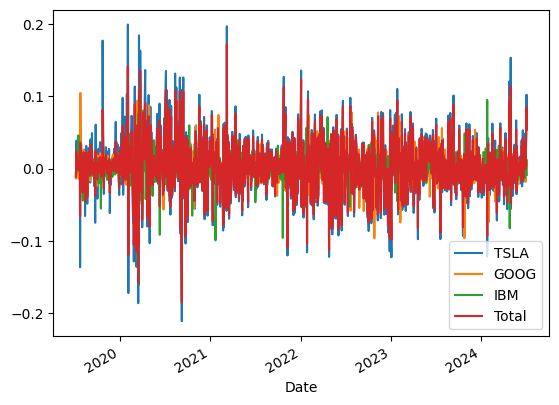

In [ ]:
# Plot the total portfolio value growth over time
portf_val_growth.plot()

Risk-adjusted return on capital (RAROC) is a risk-based profitability measurement framework for analyzing risk-adjusted financial performance and providing a consistent view of profitability across businesses.

From [Wikipedia](https://en.wikipedia.org/wiki/Risk-adjusted_return_on_capital)

A Risk Adjusted Return is none other than a calculation of the profit or potential profit given an investment. That calculation takes into consideration the accepted risk for each return.

There are different ways to calculate such risk-adjusted returns, let's explore some of them.


#### Sharpe Ratio

The formula of the Sharpe Ratio is the following:

$$
Sharpe\ Ratio = \frac{R_p - R_f}{\sigma_p}
$$

Where:

* $R_p$ is the expected portfolio return
* $R_f$ is the risk-free rate
* $\sigma_p$ is the standard deviation of the portfolio's excess return

The Sharpe ratio calculates how well an investor is compensated for the risk they've taken in an investment. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset.

In [ ]:
# Define the number of trading days in a year
N = 255

In [ ]:
# Define the risk-free rate
rf = 0.042  # 4.2%

The risk-free rate is the return expected from an investment that is considered free of risk.

In [ ]:
# Define the Sharpe ratio calculation function
def sharpe_ratio(return_series, N, rf):
    mean = (return_series.mean() * N) - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

In [ ]:
# Apply the Sharpe ratio function to each column in the portf_val_growth dataframe
sharpes = portf_val_growth.apply(sharpe_ratio, args=(N, rf), axis=0)

<Axes: title={'center': 'Sharpe Ratios of Portfolio Assets'}>

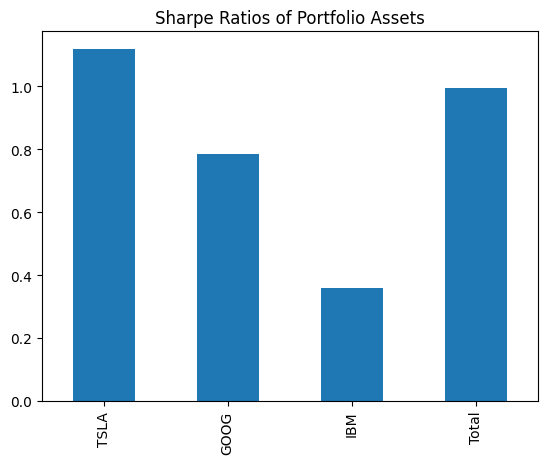

In [ ]:
# Plot the Sharpe ratios of the portfolio assets
sharpes.plot.bar(title="Sharpe Ratios of Portfolio Assets")

#### Sortino Ratio

The formula of the Sortino Ratio is the following:

$$
Sortino\ Ratio = \frac{R_p - R_f}{\sigma_d}
$$

Where:

* $R_p$ is the expected portfolio return
* $R_f$ is the risk-free rate
* $\sigma_d$ is the standard deviation of negative asset returns

The Sortino ratio is a variation of the Sharpe ratio. It takes a portfolio's return and divides it by the “Downside Risk.” Downside risk is the volatility of returns below a certain level. This level is based on average returns. The ratio measures the downside risk of a fund or stock. Like the Sharpe ratio, higher values indicate less risk relative to return.

In [ ]:
# Define the Sortino ratio calculation function
def sortino_ratio(series, N, rf):
    mean = series.mean() * N - rf
    std_neg = series[series < 0].std() * np.sqrt(N)
    return mean / std_neg

In [ ]:
# Apply the Sortino ratio function to each column in the portf_val_growth dataframe
sortinos = portf_val_growth.apply(sortino_ratio, args=(N, rf), axis=0)

<Axes: title={'center': 'Sortino Ratios of Portfolio Assets'}>

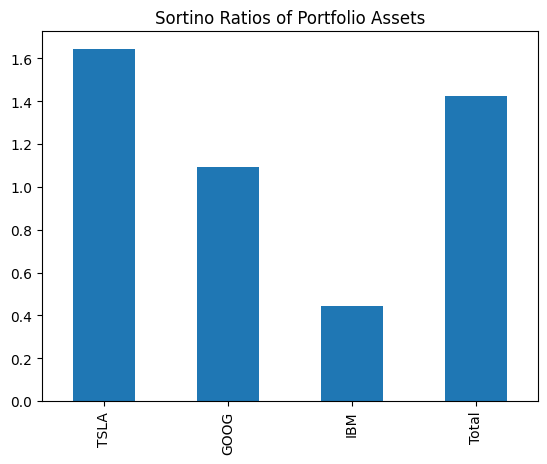

In [ ]:
# Plot the Sortino ratios of the portfolio assets
sortinos.plot.bar(title="Sortino Ratios of Portfolio Assets")